<a href="https://colab.research.google.com/github/Yavin-Owens/DataScienceTools/blob/master/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2build2).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
import pytesseract
import shutil
import os
import random
import PIL
try:
 from PIL import Image
except ImportError:
 import Image


from PIL import ImageDraw


# import library
import easyocr

#specify shortform of language you want to extract,
# I am using Hindi(hi) and English(en) here by list of language ids
reader = easyocr.Reader(['en'])

In [5]:
from google.colab import files
uploaded = files.upload()

Saving R.jpeg to R.jpeg


In [7]:
image_path_in_colab='/content/R (1).jpeg'
extractedInformation = pytesseract.image_to_string(Image.open(image_path_in_colab))
display(extractedInformation)
print(extractedInformation)

In [10]:
# Get bounding box estimates
print(pytesseract.image_to_boxes(Image.open(image_path_in_colab)))

~ 390 0 2895 1904 0



In [12]:
#tech -> python: easy-ocr lib : alot easier to use but same same 
!pip install easyocr --no-deps # Colab already has all dependencies
#dependancies
!pip install python-bidi
!pip install ninja
!pip install pyclipper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 42.1 MB/s eta 0:00:00


In [41]:
from google.colab import files
uploaded = files.upload()

Saving R.jpeg to R (1).jpeg


In [46]:
file_path = '/content/R (1).jpeg'

In [55]:
# Read Image
im = PIL.Image.open(file_path, )
im

TypeError: ignored

In [48]:
# Doing OCR. Get bounding boxes.
bounds = reader.readtext(file_path, detail=0) #detail=0 argument will only give text in array
print("Output:")
print(bounds)

Output:
['SITE SAFETY', 'All visitors and drivers', 'Children must not', 'must report to site office', 'play on this site', 'Construction work in progress.', 'High visibility', 'Parents are advised to warn', 'children of the dangers of', 'jackets', 'entering this site.', 'must be worn', 'Report all accidents', 'Danger', 'immediately', 'Deep excavations', 'Protective footwear', 'Danger', 'must be worn', 'Stop. Look. Listen.', 'Beware of trucks', 'Safety helmets are', 'No access', 'provided for', 'safety', 'for unauthorised', 'and must be worn', 'personnel', 'your']


In [49]:
# Doing OCR. Get bounding boxes.
bounds = reader.readtext(file_path, detail=1) #detail=1 
print("Output:")
print(bounds)

Output:
[([[242, 132], [754, 132], [754, 208], [242, 208]], 'SITE SAFETY', 0.8843289487168995), ([[69, 227], [452, 227], [452, 267], [69, 267]], 'All visitors and drivers', 0.5386570274572287), ([[601, 233], [867, 233], [867, 269], [601, 269]], 'Children must not', 0.49741291291364287), ([[49, 264], [472, 264], [472, 315], [49, 315]], 'must report to site office', 0.9637070399139931), ([[617, 267], [853, 267], [853, 305], [617, 305]], 'play on this site', 0.6276130042454454), ([[176, 336], [484, 336], [484, 364], [176, 364]], 'Construction work in progress.', 0.8847422379596995), ([[703, 333], [919, 333], [919, 375], [703, 375]], 'High visibility', 0.7638218592779281), ([[191, 359], [468, 359], [468, 386], [191, 386]], 'Parents are advised to warn', 0.636286920637659), ([[200, 384], [460, 384], [460, 412], [200, 412]], 'children of the dangers of', 0.49519535632446127), ([[751, 371], [871, 371], [871, 409], [751, 409]], 'jackets', 0.7933672379317042), ([[241, 406], [418, 406], [418, 43

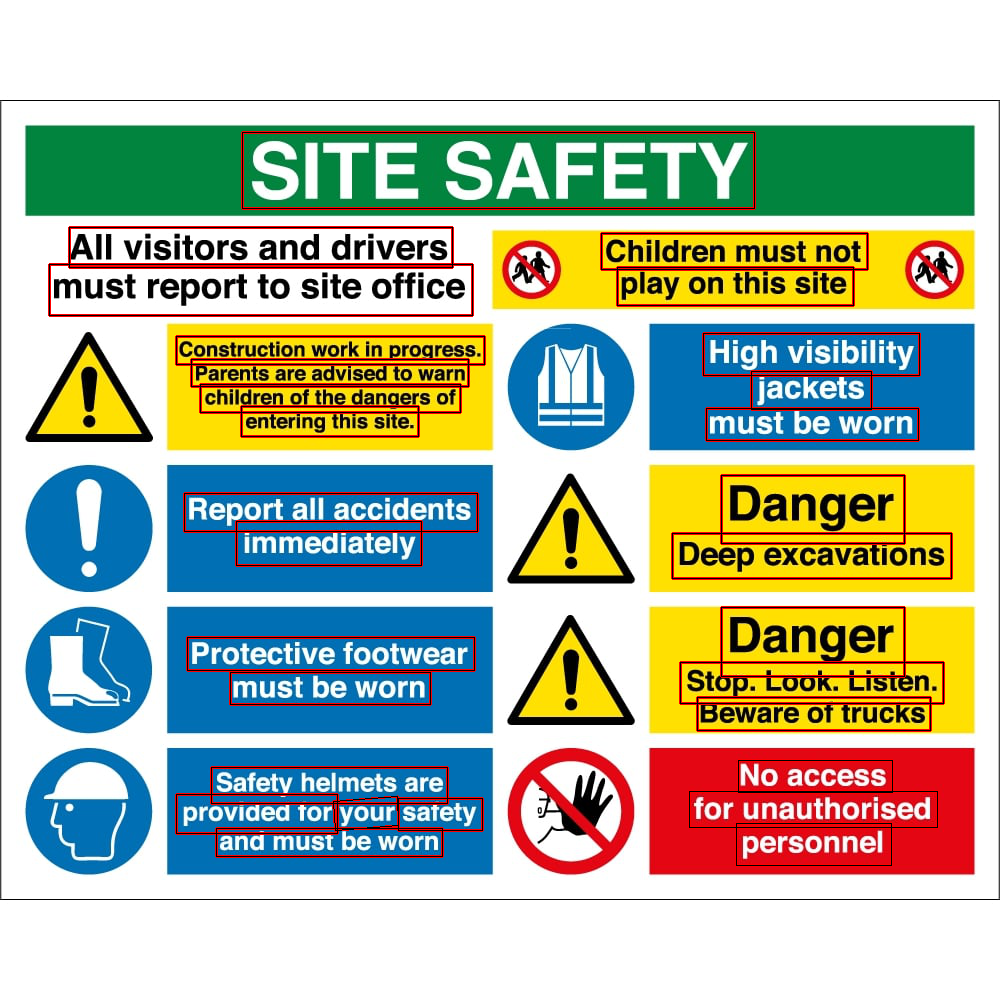

In [54]:
# Draw bounding boxes
def draw_boxes(image, bounds, color='black', width=1):
    draw = ImageDraw.Draw(image)
    for bound in bounds: # iterate though all the tuples of output
        p0, p1, p2, p3 = bound[0] # get coordinates 
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image

draw_boxes(im, bounds)

Next Steps use Spacey to identify names, emails and phone numbers within a block of text via an uploaded to 